In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel (r'/Users/isabelmo/Documents/save2.xlsx')
data

,Unnamed: 0,id,CELL METCENTER-X,CELL METCENTER-Y,CELL AREA,CELL ELLIPSE-ECCENTRICITY,CELL ELLIPSE-MAJOR AXIS LENGTH,CELL ELLIPSE-MINOR AXIS LENGTH,CELL ELLIPSE-ORIENT,CELL ENCLOSING CIRCLE RADIUS,...,CELL PERIMETER,CELL REAL DIAMETER,CELL REAL PERIMETER,CELL SOLIDITY,CELL VOLUMETRY,well,fov,coord_x,coord_y,donor
0,1074657,69,-1.503421,1.392877,-1.155498,0.411027,-1.045562,-1.446079,-0.131701,-1.509139,...,-1.504437,-1.509139,-1.583678,0.470096,-1.155498,J2,103,-5.790822,2.296323,1
1,387995,34,-1.605718,-1.418096,6.412369,-0.413982,2.697066,4.613036,1.728145,4.049810,...,4.536500,4.049810,4.498258,-0.181073,6.412370,B2,1,11.670300,3.269579,1
2,57992,65,-1.484996,-1.324654,-0.841523,0.985038,-0.527101,-1.106138,-0.727659,-0.745324,...,-0.800017,-0.745324,-0.899311,-0.348482,-0.841523,B2,222,-2.089790,-0.529179,1
3,125275,96,-1.576140,-1.311988,-1.587844,-0.925542,-1.868161,-2.411357,1.156526,-2.644240,...,-2.571740,-2.644240,-2.678984,0.375552,-1.587844,B2,215,5.596923,14.239847,1


In [56]:

embedding = data[["coord_x", "coord_y"]]
embedding

,coord_x,coord_y
0,-5.790822,2.296323
1,11.670300,3.269579
2,-2.089790,-0.529179
3,5.596923,14.239847


Loading BokehJS ...

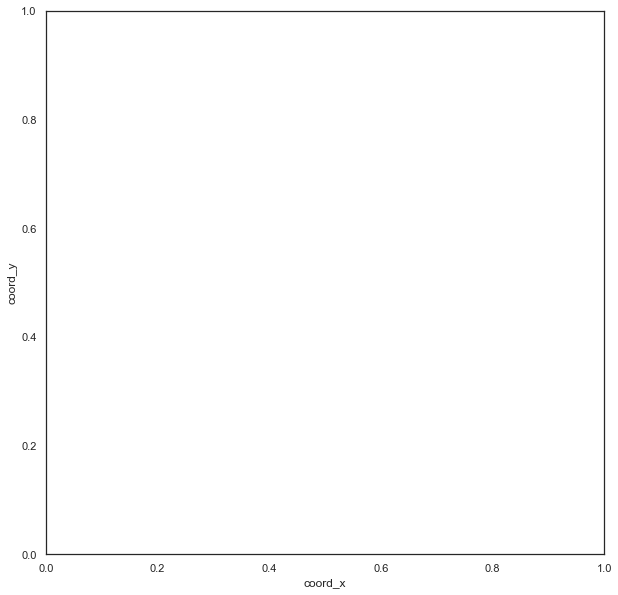

In [58]:
"""
Code for creating interactive HTML UMAP for features from BIAS.
"""

# !/usr/bin/env python
# -*- coding: utf-8 -*-
import bokeh
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure, show, output_notebook,output_file
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.palettes import Viridis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

""" Coordinates:
[
    x,y
    x,y
    x,y....
]
"""

dataset = "data" # whatever prefix you want
embedding = data[["coord_x", "coord_y"]].values.tolist() # coordinate_list x,y, must be in same order as other lists
well_list = data[["well"]].values.tolist() # well list
id_list = data[["id"]].values.tolist() # list of ids
fov_list = data[["fov"]].values.tolist() # list of field of views 
#IMPORTED_LIST = pd.read_csv("/path/to/home/wanted_list.txt") example of importing list
donor_list = data[["donor"]].values.tolist() # list of donor
SAVEPATH = "/Users/isabelmo/Documents/"

############## CREATE INTERACTIVE UMAP ############
sns.set(style="white", context="notebook", rc={"figure.figsize":(10,10)})
output_notebook()
output_file(SAVEPATH + "interactive_umap_{}.html".format(dataset))

# create umap dataframe
umap_df = pd.DataFrame(embedding, columns=("coord_x", "coord_y"))
umap_df["well"] = [str(x) for x in well_list]
umap_df["id"] = [str(x) for x in id_list]
umap_df["fov"] = [str(x) for x in fov_list]
umap_df["donor"] = [str(x) for x in donor_list]
datasource = ColumnDataSource(dict(umap_df))

umap_plot = figure(
    title="UMAP projection of the dataset",
    plot_width=800,
    plot_height=800,
    tools=("pan, wheel_zoom, reset")
)

umap_plot.add_tools(HoverTool(tooltips= """
<div>
    <span style='font-size: 12px; color: #224499'>Well:</span>
    <span style='font-size: 12px'>@well_list</span>
    <span style='font-size: 12px; color: #224499'>ID:</span>
    <span style='font-size: 12px'>@id_list</span>
    <span style='font-size: 12px; color: #224499'>FOV:</span>
    <span style='font-size: 12px'>@fov_list</span>
    <span style='font-size: 12px; color: #224499'>Donor:</span>
    <span style='font-size: 12px'>@donor_list</span>
</div>
"""))

umap_plot.circle(
"coord_x",
"coord_y",
source=datasource,
line_alpha=0.8,
fill_alpha=0.8,
size=6)
plt.xlabel("coord_x")
plt.ylabel("coord_y")

show(umap_plot)